### Load matplotlib and numpy

In [2]:
%matplotlib inline 

jupyter notebook에서 matplotlib의 그림을 brower에서 보기 위한 명령어. python이 아니라 jupyter에 명령을 하기 위해서는 %를 앞에 붙이고 명령어를 타이핑


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### [Exercise 1-1] 히스토그램(Histogram) 함수을 이용한 정규 분포(Normal distribution) 혹은 가우스 분포(Gaussian distribution)의 시각화

히스토그램(Histogram)은 구간을 나누고, 구간 내부의 있는 표본의 갯수를 나타내주는 그림이다. 본 예제에서는 정규 분포에서 표본을 얻어서 히스토그램을 그려본다.
  - 라이브러리 함수 설명 http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist

평균 $\mu$ 표준편차 $\sigma$를 갖는 정규분포에서 얻은 랜덤 표본 $x_i$는 다음과 같이 나타낸다. $x_i \sim \mathcal{N}(\mu, \sigma)$

- 평균 $\mu$ 표준편차 $\sigma$를 갖는 정규 분포 확률 밀도 함수(probability density function)  $f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$

- 표준 정규 분포의 확률 밀도 함수는 정규 분포의 parameter를 $\sigma=1$, $\mu = 0$으로 정하면 된다. $f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$

numpy에서 제공해주는 random.randn 함수는 표준 정규 분포(standard normal distribution)에서 랜덤 표본(random sample)을 얻는 함수이다.

   - https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html

numpy에서 제공해주는 random.normal 함수는 표준 정규 분포(standard normal distribution)에서 랜덤 표본(random sample)을 얻는 함수이다.

   - https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html 

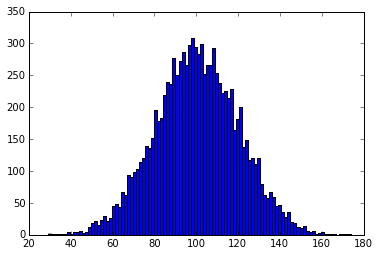

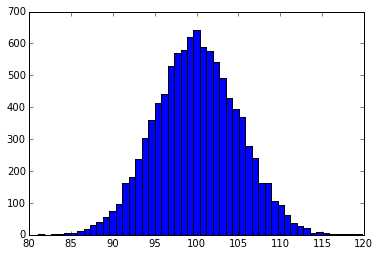

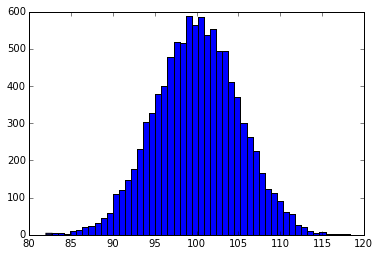

In [5]:
# [exercise 1] Using 'hist' function
# to draw a histogram from normal distribution
N_samples = 10000

# mean = 100, standard deviation 20
sigma1 = 20
mu1 = 100
x1 = np.random.randn(N_samples)*sigma1 + mu1
n, bins, patches = plt.hist(x1, 100)
plt.show()

# mean = 100, standard deviation = 5
# from standard normal distribution
sigma2 = 5
mu2 = 100
x2 = np.random.randn(N_samples)*sigma2 + mu2
n, bins, patches = plt.hist(x2, 50)
plt.show()

# mean = 100, standard deviation = 5
sigma3 = 5
mu3 = 100
x3 = np.random.normal(loc=mu3, scale=sigma3, size=N_samples)
n, bins, patches = plt.hist(x3, 50)
plt.show()

### [Exercise 1-2] Bar plot을 이용하여 직접 히스토그램을 작성

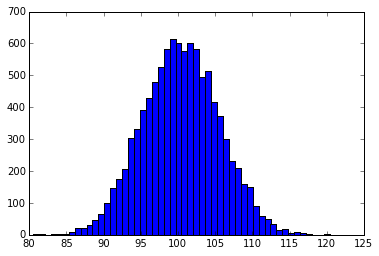

In [4]:
# [exercise 2] Draw histogram using bar
epsilon = 1e-8

# extract samples from normal distribution
N_samples = 10000
sigma = 5
mu = 100
x = np.random.normal(loc=mu, scale=sigma, size=N_samples)

numBins = 50

# count samples in each bin
maxval = max(x) + epsilon
minval = min(x)
step = numBins/(maxval-minval)
hist = np.zeros((numBins,1))
n = x.size

for i in range(0,n):
  val = (x[i]-minval)*step
  val = val.astype(int)
  hist[val] = hist[val] + 1

# plot using bar
plt.bar(np.linspace(minval,maxval,numBins),hist)
plt.show()

### [Exercise 2] Scatter plot을 이용한 2차원 데이터 시각화

random.multivariate_normal 함수로 다변수 정규 분포(multivariate normal distribution)에서도 표본을 얻을 수 있다.

이번 예시는 이렇게 얻은 표본을 scatter 함수를 이용해서 시각화한다.

아래 코드는 다음과 같은 평균(mean, $\mu$)와 공분산(Covariance, $\Sigma$)를 갖는 다변수 정규 분포(multivariate normal distribution)를 시각화한 코드이다.

$g1 \sim \mathcal{N}\left(\mu=(0, 0), \Sigma=\begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}\right)$

$g2 \sim \mathcal{N}\left(\mu=(20, 20), \Sigma=\begin{bmatrix}1 & 0 \\ 0 & 10 \end{bmatrix}\right)$

$g3 \sim \mathcal{N}\left(\mu=(40, 40), \Sigma=\begin{bmatrix}10 & 0 \\ 0 & 10 \end{bmatrix}\right)$

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


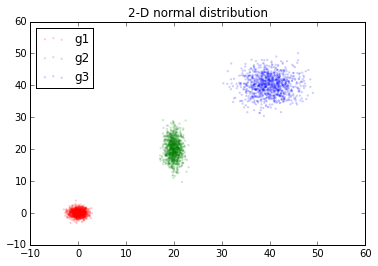

In [5]:
# scatter plot with groups
# Create data

N = 1000
g1 = np.random.multivariate_normal(mean=np.array([0.0, 0.0]), cov=np.array([[1,0],[0,1]]),size=N)
g2 = np.random.multivariate_normal(mean=np.array([20.0, 20.0]), cov=np.array([[1,0],[0,10]]),size=N)
g3 = np.random.multivariate_normal(mean=np.array([40.0, 40.0]), cov=np.array([[10,0],[0,10]]),size=N)
data = (g1, g2, g3)

colors = ("red", "green", "blue")
groups = ("g1", "g2", "g3") 

# Create plot
fig = plt.figure()
for data, color, group in zip(data, colors, groups):
    x = data[0:, 0]
    y = data[0:, 1]
    plt.scatter(x, y, alpha=0.2, c=color, edgecolors='none', s=5, label=group)

plt.title('2-D normal distribution')
plt.legend(loc=2)
plt.show()

### 연습 시간에 나왔던 질문들에 대한 답

#### 질문 1: [Exercise 2]에서 zip이라는 함수는 무엇을 해주는 문법인가요?

답: 주어진 동일한 길이의 순서형 데이터를 순서대로 tuple 형태로 묶어서 리스트로 반환해주는 함수입니다.

In [6]:
a = [1, 2, 3]
b = [4, 5, 6]
c = [7, 8, 9]
print(zip(a,b,c))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


In [7]:
a = ('abc', 'efg', 'hij')
b = (4, 5, 6)
c = ([1], [2], [3])
print(zip(a,b,c))

[('abc', 4, [1]), ('efg', 5, [2]), ('hij', 6, [3])]


#### 질문 2: [Exercise 2]에서 Scatter 함수의 인자 (parameter)가 의미하는 것은 무엇인가요?

답: 구글에서 적당한 키워드로 검색하셔서 라이브러리 문서를 찾아보시면 확인하실 수 있습니다.
- http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

#### 질문 3:  [Exercise 2]에서 plt.figure()는 무슨 일을 하나요?

답: matplotlib.pyplot.figure()는 plot을 그리기 위한 객체입니다. 굳이 없어도 그림이 그려지지만, 그림 자체의 특성을 바꾸기 위해서 이를 사용할 수 있습니다.